In [22]:
# relevant imports

import cv2
import os
import random
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from scipy import ndimage

Pos shape:  (512, 512)
Neg shape:  (388, 512)


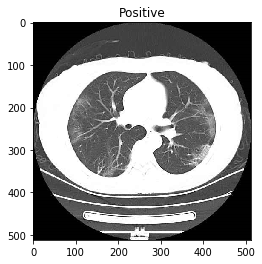

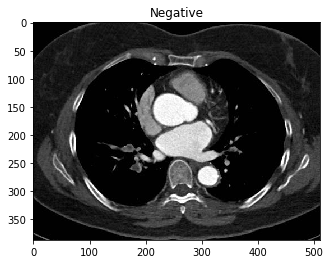

In [23]:
# Get random pos and neg, display
pos_dir = os.path.abspath("../scans/CT_COVID")
pos_img = cv2.cvtColor(img.imread(os.path.join(pos_dir, random.choice(os.listdir(pos_dir)))), cv2.COLOR_BGR2GRAY)
neg_dir = os.path.abspath("../scans/CT_NonCOVID")
neg_img = cv2.cvtColor(img.imread(os.path.join(neg_dir, random.choice(os.listdir(neg_dir)))), cv2.COLOR_BGR2GRAY)
print("Pos shape: ", np.shape(pos_img))
print("Neg shape: ", np.shape(neg_img))
plt.figure()
plt.title("Positive")
plt.imshow(pos_img, cmap = plt.cm.gray)
plt.figure()
plt.title("Negative")
plt.imshow(neg_img, cmap = plt.cm.gray)

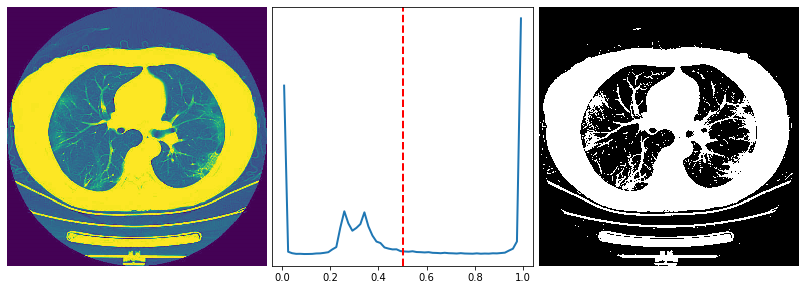

In [24]:
gmm = GMM(n_components=5, reg_covar=1e-05)

im = np.zeros((1, 1))
im[(pos_img[0]).astype(np.int), (pos_img[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=1/(4.*10))
mask = (im > im.mean()).astype(np.float)
hist, bin_edges = np.histogram(pos_img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

# Running GMM on positive image, display results
pos_gmm = gmm.fit(pos_img.reshape((pos_img.size, 1)))
threshold = np.mean(gmm.means_)
binary_img = pos_img > threshold
plt.figure(figsize=(11,4))
plt.subplot(131)
plt.imshow(pos_img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()



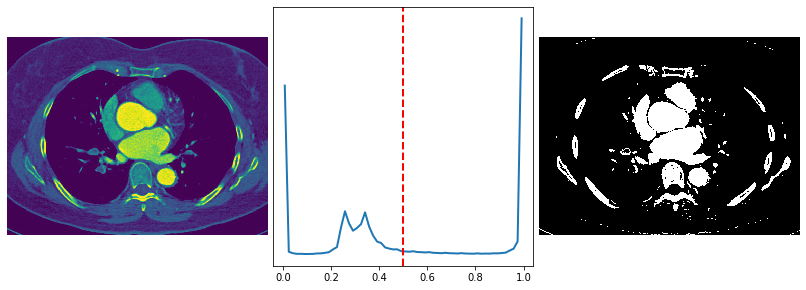

In [25]:
gmm = GMM(n_components=5, reg_covar=1e-05)

im = np.zeros((1, 1))
im[(pos_img[0]).astype(np.int), (pos_img[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=1/(4.*10))
mask = (im > im.mean()).astype(np.float)
hist, bin_edges = np.histogram(pos_img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

# Running GMM on negative image, display results
neg_gmm = gmm.fit(neg_img.reshape((neg_img.size, 1)))
threshold = np.mean(gmm.means_)
binary_img = neg_img > threshold
plt.figure(figsize=(11,4))
plt.subplot(131)
plt.imshow(neg_img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()